Author :Appau Ernest
> Team-Lead - Team Lisa






> AIM -In this notebook, we aim to build  convolutional Neural Network  model from  the 
 ESC-50_WavePlot_dataset generated to classifiy sound events (in image format in our goal to capture Illegal chainsaw activity through chainsaw sounds.This notebook contains Iteration model version  1 and its evaluation and performance metrics.Other models iterations will follow up in subsequent seperate notebooks based on other generated datasets, Feature engineering techniques and deep learning architectures



> Thsi Notebook activites are dividied into:


1.  Downloading ,Analysing and Exploring the Generated Dataset
2.  Building a convolutional neural network
3.  Improving the convolution neural network with regularization and 
image augmentation
4.  Evaluating the perfomance of our model in categorising and detecting audio events especially chainsaw activity (testing on converted-Image portfolios)



> links to the ESC-50_WavePlot_dataset


*   Target and class labels(Csv format) - https://drive.google.com/file/d/1h6bR2vFt1nkjbmH1mKK3YtRaqZqmSbqp/view?usp=sharing
*   Meta_data file for the datasets (csv format) - https://drive.google.com/file/d/1TIuKdmLJyb26J0dZ2tZXzq9pXoTV3pnp/view?usp=sharing
*  ESC-50_WavePlot_dataset (zip format)-https://drive.google.com/file/d/1DMUmwlVtyrjdHCBPCoams2lHCUxkaeHi/view?usp=sharing



> To_do- Move files to  github and change the links above when done 














In [ ]:
#define the directory to the meta data files and dataset in my gdrive
ESC = '/content/drive/My Drive/ESC-50_WavePlot_dataset.zip'
# ESC = '/content/drive/My Drive/ESC-50_WavePlot_dataset_renamed.zip'

meta_data ='/content/drive/My Drive/ESC-50_WavePlot_dataset_Meta_data.csv'
#Alternative
#if not files are not  your drive , use wget or curl to download from the links


In [ ]:
#check current working directory
%pwd

'/content'

In [ ]:
# download the dataset from github 

In [ ]:
#Extract the dataset into the current working directory
!unzip '/content/drive/My Drive/ESC-50_WavePlot_dataset.zip'


Archive:  /content/drive/My Drive/ESC-50_WavePlot_dataset.zip
   creating: content/ESC-50_WavePlot_dataset/
  inflating: content/ESC-50_WavePlot_dataset/1651|2000- 9.png  
  inflating: content/ESC-50_WavePlot_dataset/550|2000- 23.png  
  inflating: content/ESC-50_WavePlot_dataset/1540|2000- 33.png  
  inflating: content/ESC-50_WavePlot_dataset/286|2000- 29.png  
  inflating: content/ESC-50_WavePlot_dataset/961|2000- 39.png  
  inflating: content/ESC-50_WavePlot_dataset/449|2000- 27.png  
  inflating: content/ESC-50_WavePlot_dataset/225|2000- 14.png  
  inflating: content/ESC-50_WavePlot_dataset/1436|2000- 48.png  
  inflating: content/ESC-50_WavePlot_dataset/1193|2000- 2.png  
  inflating: content/ESC-50_WavePlot_dataset/1814|2000- 12.png  
  inflating: content/ESC-50_WavePlot_dataset/1981|2000- 32.png  
  inflating: content/ESC-50_WavePlot_dataset/1266|2000- 11.png  
  inflating: content/ESC-50_WavePlot_dataset/1604|2000- 9.png  
  inflating: content/ESC-50_WavePlot_dataset/1234|2000-

In [ ]:
#New esc-50waveplot extracted to my colab file working directory
dataset = '/content/content/ESC-50_WavePlot_dataset'
# dataset = '/content/content/content/ESC-50_WavePlot_dataset_renamed'
targetlabels = '/content/drive/My Drive/labels_and_target_classes(ESC50).csv'

In [ ]:
#import analysis and visualisation libraries  libraries 
import glob
import numpy as np
import os
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sn
import IPython.display as ipd

In [ ]:
#check the target labels and their classes 
#view with pandas 
target_classes = pd.read_csv(targetlabels)
Targetdf = pd.DataFrame(target_classes)
Targetdf

,Unnamed: 0,labels,classes
0,0,0,dog
1,1,14,chirping_birds
2,2,36,vacuum_cleaner
3,3,19,thunderstorm
4,4,30,door_wood_knock
5,5,34,can_opening
6,6,9,crow
7,7,22,clapping
8,8,48,fireworks
9,9,41,chainsaw


In [ ]:
#check the number of Image files in the directory and total number under each category 
imgfiles = glob.glob('/content/content/ESC-50_WavePlot_dataset/*')
Total = str(len(imgfiles))
print('total number of image files in ESC-50_WavePlot_dataset are:'+ Total )

total number of image files in ESC-50_WavePlot_dataset are:2000


In [ ]:
#split the directory name and create a list of sets containing category and directory pairs 
imgdirs = []

for img in imgfiles:
  imgfile =(img.split(' ')[1]).split('.')[0]
  catdirpair = (imgfile ,img)
  imgdirs.append(catdirpair)


  

imgdirs
 

[('15', '/content/content/ESC-50_WavePlot_dataset/745|2000- 15.png'),
 ('34', '/content/content/ESC-50_WavePlot_dataset/583|2000- 34.png'),
 ('22', '/content/content/ESC-50_WavePlot_dataset/1321|2000- 22.png'),
 ('44', '/content/content/ESC-50_WavePlot_dataset/1609|2000- 44.png'),
 ('5', '/content/content/ESC-50_WavePlot_dataset/1744|2000- 5.png'),
 ('2', '/content/content/ESC-50_WavePlot_dataset/1971|2000- 2.png'),
 ('23', '/content/content/ESC-50_WavePlot_dataset/460|2000- 23.png'),
 ('26', '/content/content/ESC-50_WavePlot_dataset/1785|2000- 26.png'),
 ('2', '/content/content/ESC-50_WavePlot_dataset/1801|2000- 2.png'),
 ('40', '/content/content/ESC-50_WavePlot_dataset/42|2000- 40.png'),
 ('6', '/content/content/ESC-50_WavePlot_dataset/1261|2000- 6.png'),
 ('28', '/content/content/ESC-50_WavePlot_dataset/1842|2000- 28.png'),
 ('1', '/content/content/ESC-50_WavePlot_dataset/1002|2000- 1.png'),
 ('36', '/content/content/ESC-50_WavePlot_dataset/495|2000- 36.png'),
 ('48', '/content/cont

In [ ]:
#check the number of Image files in each category  and group their directories based on class
#we will eliminate some sounds from the dataset that are not relevant in a 'forest'

dogs            = [fn for fn in imgdirs if '0' in fn] 
chirping_birds  = [fn for fn in imgdirs if '14' in fn] 
vacuum_cleaner  = [fn for fn in imgdirs if '36' in fn] 
thunderstorm    = [fn for fn in imgdirs if '19' in fn] 
door_wood_knock = [fn for fn in imgdirs if '30' in fn] 
can_opening     = [fn for fn in imgdirs if '34' in fn] 
crow            = [fn for fn in imgdirs if '9' in fn] 
clapping        = [fn for fn in imgdirs if '22' in fn] 
fireworks       = [fn for fn in imgdirs if '48' in fn] 
chainsaw        = [fn for fn in imgdirs if '41' in fn] 
airplane        = [fn for fn in imgdirs if '47' in fn] 
mouse_click     = [fn for fn in imgdirs if '31' in fn] 
pouring_water   = [fn for fn in imgdirs if '17' in fn] 
train           = [fn for fn in imgdirs if '45' in fn] 
sheep           = [fn for fn in imgdirs if '8' in fn] 
water_drops     = [fn for fn in imgdirs if '15' in fn] 
church_bells    = [fn for fn in imgdirs if '46' in fn] 
clock_alarm     = [fn for fn in imgdirs if '37' in fn] 
keyboard_typing = [fn for fn in imgdirs if '32' in fn] 
wind            = [fn for fn in imgdirs if '16' in fn]
footsteps       = [fn for fn in imgdirs if '25' in fn] 
frog            = [fn for fn in imgdirs if '4' in fn] 
cow             = [fn for fn in imgdirs if '3' in fn] 
brushing_teeth  = [fn for fn in imgdirs if '27' in fn] 
car_horn        = [fn for fn in imgdirs if '43' in fn] 
crackling_fire  = [fn for fn in imgdirs if '12' in fn] 
helicopter      = [fn for fn in imgdirs if '40' in fn]
drinking_sipping= [fn for fn in imgdirs if '29' in fn] 
rain            = [fn for fn in imgdirs if '10' in fn] 
insects         = [fn for fn in imgdirs if '7' in fn]
laughing        = [fn for fn in imgdirs if '26' in fn] 
hen             = [fn for fn in imgdirs if '6' in fn] 
engine          = [fn for fn in imgdirs if '44' in fn] 
breathing       = [fn for fn in imgdirs if '23' in fn] 
crying_baby     = [fn for fn in imgdirs if '20' in fn] 
hand_saw        = [fn for fn in imgdirs if '49' in fn] 
coughing        = [fn for fn in imgdirs if '24' in fn] 
glass_breaking  = [fn for fn in imgdirs if '39' in fn] 
snoring         = [fn for fn in imgdirs if '28' in fn] 
toilet_flush    = [fn for fn in imgdirs if '18' in fn]
pig             = [fn for fn in imgdirs if '2' in fn] 
washing_machine = [fn for fn in imgdirs if '35' in fn] 
clock_tick      = [fn for fn in imgdirs if '38' in fn] 
sneezing        = [fn for fn in imgdirs if '21' in fn] 
rooster         = [fn for fn in imgdirs if '1' in fn] 
sea_waves       = [fn for fn in imgdirs if '11' in fn] 
siren           = [fn for fn in imgdirs if '42' in fn] 
cat             = [fn for fn in imgdirs if '5' in fn] 
door_wood_creaks= [fn for fn in imgdirs if '33' in fn] 
crickets        = [fn for fn in imgdirs if '13' in fn] 


categorylist = [dogs,chirping_birds,vacuum_cleaner,thunderstorm,door_wood_knock,can_opening,crow,clapping,fireworks,chainsaw,airplane,mouse_click,pouring_water,train,sheep,water_drops,church_bells,clock_alarm,keyboard_typing,wind,footsteps,frog,cow,brushing_teeth,car_horn,crackling_fire,helicopter,drinking_sipping,rain,insects,laughing,hen,engine,breathing,crying_baby,hand_saw,coughing,glass_breaking,snoring,toilet_flush,pig,washing_machine,clock_tick,sneezing,rooster,sea_waves,siren,cat,door_wood_creaks,crickets] 

# # len(dogs)
id_class = {'0':	'dog',
'14' :	'chirping_birds',
'36'	 : 'vacuum_cleaner',
	'19'	 : 'thunderstorm',
	'30'	 : 'door_wood_knock',
	'34'	:  'can_opening',
	'9'	:  'crow',
	'22'	: 'clapping',
	'48'	:  'fireworks',
	'41'	:  'chainsaw',
'47' :	'airplane',
	'31'	:  'mouse_click',
	'17'  :	'pouring_water',
	'45' :	'train',
'8'	: 'sheep',
	'15'	:  'water_drops',
	'46'	: 'church_bells',
	'37'	:  'clock_alarm',
	'32'	:  'keyboard_typing',
	'16'	:  'wind',
'25'	 :  'footsteps',
	'4'	:  'frog',
	'3':  'cow',
	'27' :	'brushing_teeth',
	'43'	: 'car_horn',
	'12'	:  'crackling_fire',
	'40' :	'helicopter',
	'29'	: 'drinking_sipping',
	'10' :	'rain',
	'7'	: 'insects',
	'26'	:  'laughing',
	'6'	: 'hen',
	'44'	: 'engine',
	'23'	: 'breathing',
	'20'	:  'crying_baby',
	'49'	:  'hand_saw',
	'24'	:  'coughing',
	'39'	: 'glass_breaking',
	'28'	: 'snoring',
	'18'	: 'toilet_flush',
	'2'	: 'pig',
	'35'	: 'washing_machine',
	'38'	 : 'clock_tick',
	'21'	: 'sneezing',
	'1'	: 'rooster',
	'11'	: 'sea_waves',
	'42'	: 'siren',
	'5'	: 'cat',
	'33'	: 'door_wood_creaks',
	'13'	: 'crickets'} 
for item ,val in zip(categorylist,id_class.values()):


  print(val,'\t\t','_sound_samples :',len(item))



dog 		 _sound_samples : 40
chirping_birds 		 _sound_samples : 40
vacuum_cleaner 		 _sound_samples : 40
thunderstorm 		 _sound_samples : 40
door_wood_knock 		 _sound_samples : 40
can_opening 		 _sound_samples : 40
crow 		 _sound_samples : 40
clapping 		 _sound_samples : 40
fireworks 		 _sound_samples : 40
chainsaw 		 _sound_samples : 40
airplane 		 _sound_samples : 40
mouse_click 		 _sound_samples : 40
pouring_water 		 _sound_samples : 40
train 		 _sound_samples : 40
sheep 		 _sound_samples : 40
water_drops 		 _sound_samples : 40
church_bells 		 _sound_samples : 40
clock_alarm 		 _sound_samples : 40
keyboard_typing 		 _sound_samples : 40
wind 		 _sound_samples : 40
footsteps 		 _sound_samples : 40
frog 		 _sound_samples : 40
cow 		 _sound_samples : 40
brushing_teeth 		 _sound_samples : 40
car_horn 		 _sound_samples : 40
crackling_fire 		 _sound_samples : 40
helicopter 		 _sound_samples : 40
drinking_sipping 		 _sound_samples : 40
rain 		 _sound_samples : 40
insects 		 _sound_samples : 4

In [ ]:
  # d=[i[1] for i in dogs]
#group the dir names as a list
dogs               = [i[1] for i in dogs]
chirping_birds = [i[1] for i in chirping_birds]
vacuum_cleaner= [i[1] for i in vacuum_cleaner]
thunderstorm= [i[1] for i in thunderstorm]
door_wood_knock= [i[1] for i in door_wood_knock]
can_opening= [i[1] for i in can_opening]
crow= [i[1] for i in crow]
clapping   =[i[1] for i in clapping]
fireworks=[i[1] for i in fireworks]
chainsaw=[i[1] for i in chainsaw]
airplane=[i[1] for i in airplane]
mouse_click=[i[1] for i in mouse_click]
pouring_water=[i[1] for i in pouring_water]
train=[i[1] for i in train]
sheep=[i[1] for i in sheep]
water_drops=[i[1] for i in water_drops]
church_bells=[i[1] for i in church_bells]
clock_alarm=[i[1] for i in clock_alarm]
keyboard_typing=[i[1] for i in keyboard_typing]
wind=[i[1] for i in wind]
footsteps=[i[1] for i in footsteps]
frog=[i[1] for i in frog]
cow=[i[1] for i in cow]
brushing_teeth=[i[1] for i in brushing_teeth]
car_horn=[i[1] for i in car_horn]
crackling_fire=[i[1] for i in crackling_fire]
helicopter=[i[1] for i in helicopter]
drinking_sipping=[i[1] for i in drinking_sipping]
rain=[i[1] for i in rain]
insects=[i[1] for i in insects]
laughing=[i[1] for i in laughing]
hen=[i[1] for i in hen]
engine=[i[1] for i in engine]
breathing =[i[1] for i in breathing]
crying_baby=[i[1] for i in crying_baby]
hand_saw=[i[1] for i in hand_saw]
coughing=[i[1] for i in coughing]
glass_breaking=[i[1] for i in glass_breaking]
snoring=[i[1] for i in snoring]
toilet_flush=[i[1] for i in toilet_flush]
pig=[i[1] for i in pig]
washing_machine=[i[1] for i in washing_machine]
clock_tick=[i[1] for i in clock_tick]
sneezing=[i[1] for i in sneezing]
rooster=[i[1] for i in rooster]
sea_waves=[i[1] for i in sea_waves]
siren=[i[1] for i in siren]
cat=[i[1] for i in cat]
door_wood_creaks=[i[1] for i in door_wood_creaks]
crickets=[i[1] for i in crickets]




In [ ]:
#sanity check
dogs

['/content/content/ESC-50_WavePlot_dataset/1736|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1800|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1376|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1570|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/700|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1230|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/935|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/902|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/146|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1699|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1521|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/898|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/258|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/24|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/315|2000- 0.png',
 '/content/content/ESC-50_WavePlot_dataset/1431|2000- 0.png',
 '/content/conten

To avoid the space in the name raising errors during the generation of our dataset, the function below is written to rename the files 

In [ ]:
#Function to rename multiple files
def rename(catnum,catname,data, dirlist):
  # catnum - category number /i revised the function, hence catnum is just a place holder 
  # catname - category name 
  # data - path directory 
  # dirlist - list of dir you want to rename 
  i = 0
  e = 1
  data1= np.array(os.listdir(data))
  dirlist = (dirlist)
  
  for z in dirlist:
    for w in data1:
      f1=  (z.split('/')[4])
      if  str(f1)  == str(w) :
        a = w.split(' ')#to-do:modify function to rname catname+catnum.png
        catname = str(catname)
        dst = data + '/'+ catname + str(e) + '.png'
        # dst = data + '/'+ catname  + '.png'
        src = data + '/' + w
        os.rename(src, dst)
        # print(src, dst )
        i += 1
        e+=1

In [ ]:
#define directory in which we unpacked the image files
dta ='/content/content/content/ESC-50_WavePlot_dataset_renamed'


#create a new list of directory for each category by using the rename util fucntion in cell above ,
#NB 42 is a place holder for catnum(category number,)
#function has being revised hence catname plays no role in renaming files 
#To-do :remove 42 placholder

rename(42,'dogs',dta, dogs)
rename(42,'chirping_birds',dta, chirping_birds)
rename(42,'vacuum',dta, vacuum_cleaner)
rename(42,'thunderstorm',dta, thunderstorm)
rename(42,'door_wood_knock',dta, door_wood_knock)
rename(42,'can_opening',dta, can_opening)
rename(42,'crow',dta, crow)
rename(42,'clapping',dta, clapping)
rename(42,'fireworks',dta, fireworks)
rename(42,'chainsaw',dta, chainsaw)
rename(42,'airplane',dta, airplane)
rename(42,'mouse_click',dta, mouse_click)
rename(42,'pouring_water',dta, pouring_water)
rename(42,'train',dta, train)
rename(42,'sheep',dta, sheep)
rename(42,'water_drops',dta, water_drops)
rename(42,'church_bells',dta, church_bells)
rename(42,'clock_alarm',dta, clock_alarm)
rename(42,'keyboard_typing',dta, keyboard_typing)
rename(42,'wind',dta, wind)
rename(42,'footsteps',dta, footsteps)
rename(42,'frogs',dta, frog)
rename(42,'cow',dta, cow)
rename(42,'brushing_teeth',dta, brushing_teeth)
rename(42,'car_horn',dta, car_horn)
rename(42,'crackling_fire',dta, crackling_fire)
rename(42,'helicopter',dta, helicopter)
rename(42,'drinking_sipping',dta, drinking_sipping)
rename(42,'rain',dta, rain)
rename(42,'insects',dta, insects)
rename(42,'laughing',dta, laughing)
rename(42,'hen',dta, hen)
rename(42,'engine',dta, engine)
rename(42,'breathing',dta, breathing)
rename(42,'crying_baby',dta, crying_baby)
rename(42,'hand_saw',dta, hand_saw)
rename(42,'coughing',dta, coughing)
rename(42,'glass_breaking',dta, glass_breaking)
rename(42,'snoring',dta, snoring)
rename(42,'toilet_flush',dta, toilet_flush)
rename(42,'pig',dta, pig)
rename(42,'washing_machine',dta, washing_machine)
rename(42,'clock_tick',dta, clock_tick)
rename(42,'sneezing',dta, sneezing)
rename(42,'rooster',dta, rooster)
rename(42,'sea_waves',dta, sea_waves)
rename(42,'siren',dta, siren)
rename(42,'cat',dta, cat)
rename(42,'doorwood',dta, door_wood_creaks)
rename(42,'crickets',dta, crickets)

With the renamed dataset, we can begin from here.But if you are not using the renamed dataset, start drom the above by renaming the files 














to=do

In [ ]:
# download and unzip the renamed dataset

!wget

!unzip 

In [ ]:
# Define a new directory of files after renaming
Newimgdirs = glob.glob('/content/content/content/ESC-50_WavePlot_dataset_renamed/*')
Newimgdirs[0],len(Newimgdirs)

('/content/content/ESC-50_WavePlot_dataset/rain.png', 50)

In [ ]:
#group the images into category list 
Newimgdirs = Newimgdirs

dogs            = [fn for fn in Newimgdirs if 'dogs' in fn] 
chirping_birds  = [fn for fn in Newimgdirs if 'chirping' in fn] 
vacuum_cleaner  = [fn for fn in Newimgdirs if 'vacuum_cleaner' in fn] 
thunderstorm    = [fn for fn in Newimgdirs if 'thunder' in fn] 
door_wood_knock = [fn for fn in Newimgdirs if 'door_wood_knock' in fn] 
can_opening     = [fn for fn in Newimgdirs if 'can_opening' in fn] 
crow            = [fn for fn in Newimgdirs if 'cro' in fn] 
clapping        = [fn for fn in Newimgdirs if 'clapping' in fn] 
fireworks       = [fn for fn in Newimgdirs if 'fireworks' in fn] 
chainsaw        = [fn for fn in Newimgdirs if 'chainsaw' in fn] 
airplane        = [fn for fn in Newimgdirs if 'airplane' in fn] 
mouse_click     = [fn for fn in Newimgdirs if 'mouse_click' in fn] 
pouring_water   = [fn for fn in Newimgdirs if 'pouring_water' in fn] 
train           = [fn for fn in Newimgdirs if 'train' in fn] 
sheep           = [fn for fn in Newimgdirs if 'sheep' in fn] 
water_drops     = [fn for fn in Newimgdirs if 'water_drops' in fn] 
church_bells    = [fn for fn in Newimgdirs if 'church_bells' in fn] 
clock_alarm     = [fn for fn in Newimgdirs if 'clock_alarms' in fn] 
keyboard_typing = [fn for fn in Newimgdirs if 'keyboard_typing' in fn] 
wind            = [fn for fn in Newimgdirs if 'wind' in fn]
footsteps       = [fn for fn in Newimgdirs if 'footsteps' in fn] 
frog            = [fn for fn in Newimgdirs if 'frog' in fn] 
cow             = [fn for fn in Newimgdirs if 'cow' in fn] 
brushing_teeth  = [fn for fn in Newimgdirs if 'brushing_teeth' in fn] 
car_horn        = [fn for fn in Newimgdirs if 'car_horn' in fn] 
crackling_fire  = [fn for fn in Newimgdirs if 'crackling_fire' in fn] 
helicopter      = [fn for fn in Newimgdirs if 'helicopter' in fn]
drinking_sipping= [fn for fn in Newimgdirs if 'drinking_sipping' in fn] 
rain            = [fn for fn in Newimgdirs if 'rain' in fn] 
insects         = [fn for fn in Newimgdirs if 'insects' in fn]
laughing        = [fn for fn in Newimgdirs if 'laughing' in fn] 
hen             = [fn for fn in Newimgdirs if 'hen' in fn] 
engine          = [fn for fn in Newimgdirs if 'engine' in fn] 
breathing       = [fn for fn in Newimgdirs if 'breathing' in fn] 
crying_baby     = [fn for fn in Newimgdirs if 'crying_baby' in fn] 
hand_saw        = [fn for fn in Newimgdirs if 'hand_saw' in fn] 
coughing        = [fn for fn in Newimgdirs if 'coughing' in fn] 
glass_breaking  = [fn for fn in Newimgdirs if 'glass_breaking' in fn] 
snoring         = [fn for fn in Newimgdirs if 'snoring' in fn] 
toilet_flush    = [fn for fn in Newimgdirs if 'toilet_flush' in fn]
pig             = [fn for fn in Newimgdirs if 'pig' in fn] 
washing_machine = [fn for fn in Newimgdirs if 'washing_machine' in fn] 
clock_tick      = [fn for fn in Newimgdirs if 'clock_tick ' in fn] 
sneezing        = [fn for fn in Newimgdirs if 'sneezing' in fn] 
rooster         = [fn for fn in Newimgdirs if 'rooster' in fn] 
sea_waves       = [fn for fn in Newimgdirs if 'sea_waves' in fn] 
siren           = [fn for fn in Newimgdirs if 'siren' in fn] 
cat             = [fn for fn in Newimgdirs if 'cat' in fn] 
door_wood_creaks= [fn for fn in Newimgdirs if 'door_wood_creaks' in fn] 
crickets        = [fn for fn in Newimgdirs if 'crickets' in fn] 


In [ ]:
# #sanity check
len(chirping_birds),chirping_birds


(40,
 ['/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds21.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds26.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds20.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds40.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds17.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds7.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds6.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds22.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds18.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds31.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds19.png',
  '/content/content/content/ESC-50_WavePlot_dataset_renamed/chirping_birds1.png',
  

From the above, It can be observed that all 50 classes posses 40 files thus making the total number of images in the datset exactly 2000

> It can also be noted that , our dataset posses data on environmental sounds not really significant to our modelling process.The essential sound portfolis needed for a realistics application includes sounds that have origins from :

1.   Human activity eg laughing,sneezing 
This helps in detecting a human prescence/activity in at the location where the listening device will be deployed 
2.   chainsaw / Handsaw sounds as indicators of illegal logging activity occuring
3.Engine and vehicular sounds also indicating the precense of human activity such as engine sounds and sirens
4.Animal and natural sounds to detect the  presence of forest animals. eg birds chirping and thunder storms 



> In conclusion, we will drop sound files in these categories:



1.   vacuum_cleaner
2.   door_wood_knock 
3.mouse_click 
4.airplane
5.train
6.church bells 
7.clock alarms
8.Keyboard typing
9.brushing teeth
10.helicopter
11.drinking sipping
12.washing machine
13.clock tick
14.toilet flush
15.sea waves
16.door wood cracks
18.dogs

> In total , we are eliminating a total of 680 image feature maps from the dataset due to their irrelevance to the application use case













In cells *below* we are going to visualise a few samples from the selected categories 

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array,array_to_img
import shutil
%matplotlib inline 

In [ ]:
# we use this function to visualise the similarities in the image plots of random samples each category

#pass in the name of the category and number of plots you want to visualise 
#This function depends on matplotlib and load_img method from keras.preprocessing.image




def view_waveplot(x,category):
  
  h = 0
  for one in category :#x here represents number of plots you want to view 
    o=np.random.choice(category) 
    image=(load_img(o))
    plt.imshow(image)
    plt.show()
    h+=1
    if h == x:
      break





#a utility function to a log progress 
def progress_logger(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

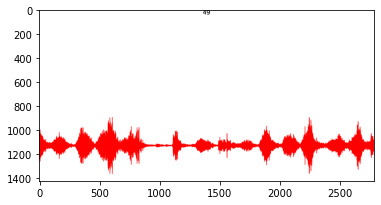

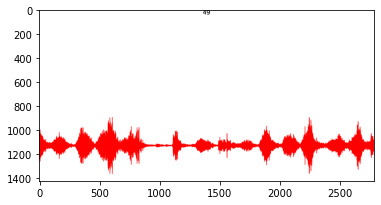

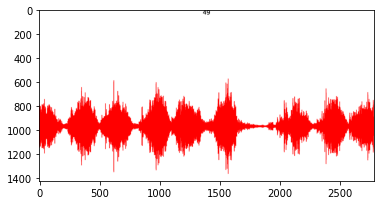

In [ ]:
#Visualise similarities for handsaw
view_waveplot(3,hand_saw)

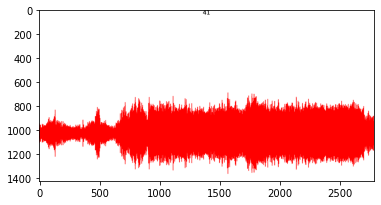

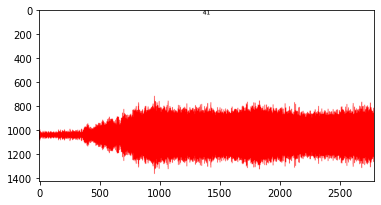

In [ ]:
#Visualise similarities for handsaw
view_waveplot(2,chainsaw)

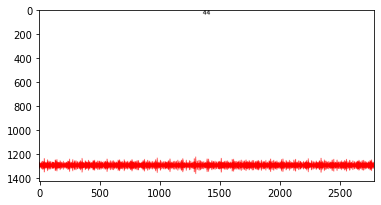

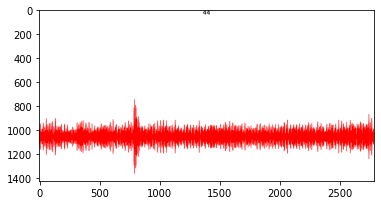

In [ ]:
#Visualise similarities for handsaw
view_waveplot(2,engine)

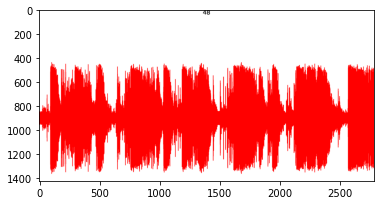

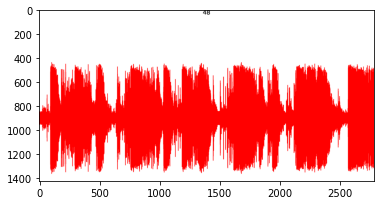

In [ ]:
#Visualise similarities for handsaw
view_waveplot(2,fireworks)

We split our dataset into train,test and validation sets

In [ ]:
#split our datasets into train test and validatiion 
#we have 40 files in each category, the split is going to be a 30 train:5 validation:5 test
#To do complete the rest of the splits ,follow the format



#Train split
chirping_birds_train = np.random.choice(chirping_birds, size=30, replace=True)  
thunderstorm_train   = np.random.choice(thunderstorm, size=30, replace=True)  
can_opening_train     = np.random.choice(can_opening, size=30, replace=True)  
crow_train            = np.random.choice(crow, size=30, replace=True)  
clapping_train        = np.random.choice(clapping, size=30, replace=True)  
fireworks_train       = np.random.choice(fireworks, size=30, replace=True)  
chainsaw_train        = np.random.choice(chainsaw, size=30, replace=True)  
pouring_water_train   = np.random.choice(pouring_water, size=30, replace=True)  
sheep_train           = np.random.choice(sheep, size=30, replace=True)  
water_drops_train     = np.random.choice(water_drops, size=30, replace=True)  
wind_train            = np.random.choice(wind, size=30, replace=True)  
footsteps_train       = np.random.choice(footsteps, size=30, replace=True)  
frog_train            = np.random.choice(frog, size=30, replace=True)  
cow_train             = np.random.choice(cow, size=30, replace=True)  
car_horn_train        = np.random.choice(car_horn, size=30, replace=True)  
crackling_fire_train  = np.random.choice(crackling_fire, size=30, replace=True)  
rain_train            = np.random.choice(rain, size=30, replace=True)  
insects_train         = np.random.choice(insects, size=30, replace=True)  
laughing_train        = np.random.choice(laughing, size=30, replace=True)  
hen_train             = np.random.choice(hen, size=30, replace=True)  
engine_train          = np.random.choice(engine, size=30, replace=True)  
breathing_train       = np.random.choice(breathing, size=30, replace=True)  
crying_baby_train     = np.random.choice(crying_baby, size=30, replace=True)  
hand_saw_train        = np.random.choice(hand_saw, size=30, replace=True)  
coughing_train        = np.random.choice(coughing, size=30, replace=True)  
pig_train             = np.random.choice(pig, size=30, replace=True)  
sneezing_train        = np.random.choice(sneezing, size=30, replace=True)  
rooster_train         = np.random.choice(rooster, size=30, replace=True)  
siren_train           = np.random.choice(siren, size=30, replace=True)  
cat_train             = np.random.choice(cat, size=30, replace=True)  
crickets_train        = np.random.choice(crickets, size=30, replace=True)  

# files  left to split set = Initial files set minus random selected above train set 

chirping_birds  = list(set(chirping_birds) - set(chirping_birds_train)) 
thunderstorm    = list(set(thunderstorm) - set(thunderstorm_train))
can_opening     = list(set(can_opening) - set(can_opening_train))
crow            = list(set(crow) - set(crow_train))
clapping        = list(set(clapping) - set(clapping_train))
fireworks       = list(set(fireworks) - set(fireworks_train))
chainsaw        = list(set(chainsaw) - set(chainsaw_train))
pouring_water   = list(set(pouring_water) - set(pouring_water_train))
sheep           = list(set(sheep) - set(sheep_train))
water_drops     = list(set(water_drops) - set(water_drops_train))
wind            = list(set(wind) - set(wind_train))
footsteps       = list(set(footsteps) - set(footsteps_train))
frog            = list(set(frog) - set(frog_train))
cow             = list(set(cow) - set(cow_train))
car_horn        = list(set(car_horn ) - set(car_horn_train))
crackling_fire  = list(set(crackling_fire) - set(crackling_fire_train))
rain            = list(set(rain) - set(rain_train))
insects         = list(set(insects) - set(insects_train))
laughing        = list(set(laughing) - set(laughing_train))
hen             = list(set(hen) - set(hen_train))
engine          = list(set(engine) - set(engine_train))
breathing       = list(set(breathing) - set(breathing_train))
crying_baby     = list(set(crying_baby) - set(crying_baby_train))
hand_saw        = list(set(hand_saw) - set(hand_saw_train))
coughing        = list(set(coughing) - set(coughing_train))
pig             = list(set(pig) - set(pig_train))
sneezing        = list(set(sneezing) - set(sneezing_train))
rooster         = list(set(rooster) - set(rooster_train))
siren           = list(set(siren) - set(siren_train))
cat             = list(set(cat) - set(cat_train))
crickets        = list(set(crickets) - set(crickets_train))  


#Validation split

chirping_birds_val = np.random.choice(chirping_birds, size=5, replace=True)
thunderstorm_val   = np.random.choice(thunderstorm, size=5, replace=True)
can_opening_val    = np.random.choice(can_opening, size=5, replace=True)
crow_val           = np.random.choice(crow, size=5, replace=True)
clapping_val       = np.random.choice(clapping, size=5, replace=True)
fireworks_val      = np.random.choice(fireworks, size=5, replace=True)
chainsaw_val       = np.random.choice(chainsaw, size=5, replace=True)
pouring_water_val  = np.random.choice(pouring_water, size=5, replace=True)
sheep_val          = np.random.choice(sheep, size=5, replace=True)
water_drops_val    = np.random.choice(water_drops, size=5, replace=True)
wind_val           = np.random.choice(wind, size=5, replace=True)
footsteps_val      = np.random.choice(footsteps, size=5, replace=True)
frog_val           = np.random.choice(frog, size=5, replace=True)
cow_val            = np.random.choice(cow, size=5, replace=True)
car_horn_val       = np.random.choice(car_horn, size=5, replace=True)
crackling_fire_val = np.random.choice(crackling_fire, size=5, replace=True)
rain_val           = np.random.choice(rain, size=5, replace=True)
insects_val        = np.random.choice(insects, size=5, replace=True)
laughing_val       = np.random.choice(laughing, size=5, replace=True)
hen_val            = np.random.choice(hen, size=5, replace=True)
engine_val         = np.random.choice(engine, size=5, replace=True)
breathing_val      = np.random.choice(breathing, size=5, replace=True)
crying_baby_val    = np.random.choice(crying_baby, size=5, replace=True)
hand_saw_val       = np.random.choice(hand_saw, size=5, replace=True)
coughing_val       = np.random.choice(coughing, size=5, replace=True)
pig_val            = np.random.choice(pig, size=5, replace=True)
sneezing_val       = np.random.choice(sneezing, size=5, replace=True)
rooster_val        = np.random.choice(rooster, size=5, replace=True)
siren_val          = np.random.choice(siren, size=5, replace=True)
cat_val            = np.random.choice(cat, size=5, replace=True)
crickets_val       = np.random.choice(crickets, size=5, replace=True)

# files  left to split set = Initial files set minus random selected above validation set 


chirping_birds  = list(set(chirping_birds) - set(chirping_birds_val)) 
thunderstorm    = list(set(thunderstorm) - set(thunderstorm_val))
can_opening     = list(set(can_opening) - set(can_opening_val))
crow            = list(set(crow) - set(crow_val))
clapping        = list(set(clapping) - set(clapping_val))
fireworks       = list(set(fireworks) - set(fireworks_val))
chainsaw        = list(set(chainsaw) - set(chainsaw_val))
pouring_water   = list(set(pouring_water) - set(pouring_water_val))
sheep           = list(set(sheep) - set(sheep_val))
water_drops     = list(set(water_drops) - set(water_drops_val))
wind            = list(set(wind) - set(wind_val))
footsteps       = list(set(footsteps) - set(footsteps_val))
frog            = list(set(frog) - set(frog_val))
cow             = list(set(cow) - set(cow_val))
car_horn        = list(set(car_horn ) - set(car_horn_val))
crackling_fire  = list(set(crackling_fire) - set(crackling_fire_val))
rain            = list(set(rain) - set(rain_val))
insects         = list(set(insects) - set(insects_val))
laughing        = list(set(laughing) - set(laughing_val))
hen             = list(set(hen) - set(hen_val))
engine          = list(set(engine) - set(engine_val))
breathing       = list(set(breathing) - set(breathing_val))
crying_baby     = list(set(crying_baby) - set(crying_baby_val))
hand_saw        = list(set(hand_saw) - set(hand_saw_val))
coughing        = list(set(coughing) - set(coughing_val))
pig             = list(set(pig) - set(pig_val))
sneezing        = list(set(sneezing) - set(sneezing_val))
rooster         = list(set(rooster) - set(rooster_val))
siren           = list(set(siren) - set(siren_val))
cat             = list(set(cat) - set(cat_val))
crickets        = list(set(crickets) - set(crickets_val))  

#Test_split
chirping_birds_test = np.random.choice(chirping_birds, size=5, replace=True)
thunderstorm_test   = np.random.choice(thunderstorm, size=5, replace=True)
can_opening_test   = np.random.choice(can_opening, size=5, replace=True)
crow_test          = np.random.choice(crow, size=5, replace=True)
clapping_test       = np.random.choice(clapping, size=5, replace=True)
fireworks_test     = np.random.choice(fireworks, size=5, replace=True)
chainsaw_test       = np.random.choice(chainsaw, size=5, replace=True)
pouring_water_test  = np.random.choice(pouring_water, size=5, replace=True)
sheep_test          = np.random.choice(sheep, size=5, replace=True)
water_drops_test    = np.random.choice(water_drops, size=5, replace=True)
wind_test          = np.random.choice(wind, size=5, replace=True)
footsteps_test     = np.random.choice(footsteps, size=5, replace=True)
frog_test           = np.random.choice(frog, size=5, replace=True)
cow_test           = np.random.choice(cow, size=5, replace=True)
car_horn_test      = np.random.choice(car_horn, size=5, replace=True)
crackling_fire_test = np.random.choice(crackling_fire, size=5, replace=True)
rain_test           = np.random.choice(rain, size=5, replace=True)
insects_test        = np.random.choice(insects, size=5, replace=True)
laughing_test       = np.random.choice(laughing, size=5, replace=True)
hen_test            = np.random.choice(hen, size=5, replace=True)
engine_test         = np.random.choice(engine, size=5, replace=True)
breathing_test      = np.random.choice(breathing, size=5, replace=True)
crying_baby_test   = np.random.choice(crying_baby, size=5, replace=True)
hand_saw_test       = np.random.choice(hand_saw, size=5, replace=True)
coughing_test       = np.random.choice(coughing, size=5, replace=True)
pig_test            = np.random.choice(pig, size=5, replace=True)
sneezing_test       = np.random.choice(sneezing, size=5, replace=True)
rooster_test        = np.random.choice(rooster, size=5, replace=True)
siren_test        = np.random.choice(siren, size=5, replace=True)
cat_test           = np.random.choice(cat, size=5, replace=True)
crickets_test      = np.random.choice(crickets, size=5, replace=True)

#print out splits
print('chirping_birdsdatasets:', chirping_birds_train.shape, chirping_birds_val.shape, chirping_birds_test.shape)
print('thunderstorm datasets:', thunderstorm_train.shape, thunderstorm_val.shape, thunderstorm_test.shape)
print('can_opening datasets:', can_opening_train.shape,can_opening_val.shape, can_opening_test.shape)
print('crow datasets:', crow_train.shape, crow_val.shape, crow_test.shape)
print('clapping datasets:', clapping_train.shape, clapping_val.shape, clapping_test.shape)
print('fireworks datasets:', fireworks_train.shape, fireworks_val.shape, fireworks_test.shape)
print('chainsaw datasets:', chainsaw_train.shape,chainsaw_val.shape, chainsaw_test.shape)
print('pouring_water datasets:', pouring_water_train.shape, pouring_water_val.shape,pouring_water_test.shape)
print('sheep datasets:', sheep_train.shape, sheep_val.shape, sheep_test.shape)
print('water_drops datasets:', water_drops_train.shape, water_drops_val.shape, water_drops_test.shape)
print('wind datasets:', wind_train.shape, wind_val.shape, wind_test.shape)
print('footsteps datasets:', footsteps_train.shape, footsteps_val.shape, footsteps_test.shape)
print('frog datasets:', frog_train.shape, frog_val.shape, frog_test.shape)
print('cow datasets:', cow_train.shape, cow_val.shape, cow_test.shape)
print('car_horn datasets:',car_horn_train.shape, car_horn_val.shape, car_horn_test.shape)
print('crackling_fire datasets:', crackling_fire_train.shape, crackling_fire_val.shape, crackling_fire_test.shape)
print('rain datasets:', rain_train.shape, rain_val.shape, rain_test.shape)
print('insects datasets:', insects_train.shape, insects_val.shape, insects_test.shape)
print('laughing datasets:', laughing_train.shape, laughing_val.shape, laughing_test.shape)
print('hen datasets:', hen_train.shape, hen_val.shape, hen_test.shape)
print('engine datasets:', engine_train.shape, engine_val.shape, engine_test.shape)
print('crying_baby datasets:',crying_baby_train.shape, crying_baby_val.shape,crying_baby_test.shape)
# print('crying_baby datasets:', crying_baby_train.shape, crying_baby_val.shape, crying_baby_test.shape)
print('hand_saw datasets:', hand_saw_train.shape, hand_saw_val.shape, hand_saw_test.shape)
print('coughing datasets:', coughing_train.shape,coughing_val.shape, coughing_test.shape)
print('pig datasets:', pig_train.shape, pig_val.shape, pig_test.shape)
print('sneezing datasets:', sneezing_train.shape, sneezing_val.shape, sneezing_test.shape)
print('rooster datasets:', rooster_train.shape,rooster_val.shape, rooster_test.shape)
print('sirendatasets:', siren_train.shape,siren_val.shape, siren_test.shape)
print('cat datasets:', cat_train.shape, cat_val.shape, cat_test.shape)
print('crickets datasets:', crickets_train.shape, crickets_val.shape, crickets_test.shape)


chirping_birdsdatasets: (30,) (5,) (5,)
thunderstorm datasets: (30,) (5,) (5,)
can_opening datasets: (30,) (5,) (5,)
crow datasets: (30,) (5,) (5,)
clapping datasets: (30,) (5,) (5,)
fireworks datasets: (30,) (5,) (5,)
chainsaw datasets: (30,) (5,) (5,)
pouring_water datasets: (30,) (5,) (5,)
sheep datasets: (30,) (5,) (5,)
water_drops datasets: (30,) (5,) (5,)
wind datasets: (30,) (5,) (5,)
footsteps datasets: (30,) (5,) (5,)
frog datasets: (30,) (5,) (5,)
cow datasets: (30,) (5,) (5,)
car_horn datasets: (30,) (5,) (5,)
crackling_fire datasets: (30,) (5,) (5,)
rain datasets: (30,) (5,) (5,)
insects datasets: (30,) (5,) (5,)
laughing datasets: (30,) (5,) (5,)
hen datasets: (30,) (5,) (5,)
engine datasets: (30,) (5,) (5,)
crying_baby datasets: (30,) (5,) (5,)
hand_saw datasets: (30,) (5,) (5,)
coughing datasets: (30,) (5,) (5,)
pig datasets: (30,) (5,) (5,)
sneezing datasets: (30,) (5,) (5,)
rooster datasets: (30,) (5,) (5,)
sirendatasets: (30,) (5,) (5,)
cat datasets: (30,) (5,) (5,)
c

In [ ]:
#After creating the train test split , we write them out to seperate folders on the disk 
#define variables
train_dir = 'training_data'
val_dir = 'validation_data'
test_dir = 'test_data'

#concatenate the split files into three genral folders
train_files = np.concatenate([chirping_birds_train, thunderstorm_train,can_opening_train,crow_train,clapping_train,fireworks_train,chainsaw_train,
                             pouring_water_train,sheep_train,water_drops_train,wind_train,footsteps,\
                             frog_train,cow_train,car_horn_train,crackling_fire_train,rain_train,insects_train,\
                             laughing_train,hen_train,engine_train,crying_baby_train, hand_saw_train,coughing_train, pig_train,
                             sneezing_train,rooster_train,siren_train,cat_train,crickets_train]) 


validate_files =np.concatenate([chirping_birds_val, thunderstorm_val,can_opening_val,crow_val,clapping_val,\
                             fireworks_val,chainsaw_val,\
                             pouring_water_val,sheep_val,water_drops_val,wind_val,footsteps,frog_val,cow_val,car_horn_val,crackling_fire_val,rain_val,insects_val,laughing_val,hen_val,engine_val,crying_baby_val, hand_saw_val,coughing_val,pig_val,sneezing_val,rooster_val,siren_val,cat_val,crickets_val])
test_files =np.concatenate([chirping_birds_test, thunderstorm_test,can_opening_test,crow_test,clapping_test,\
                             fireworks_test,chainsaw_test,\
                             pouring_water_test,sheep_test,water_drops_test,wind_test,footsteps,\
                             frog_test,cow_test,car_horn_test,crackling_fire_test,rain_test,insects_test,\
                             laughing_test,hen_test,engine_test,crying_baby_test, hand_saw_test,coughing_test,\
                             pig_test,sneezing_test,rooster_test,siren_test,cat_test,crickets_test])
#create a directory for the three folders above to store the splits
#NB:check the current directory
os.mkdir(train_dir) if not os.path.isdir(train_dir) else None
os.mkdir(val_dir) if not os.path.isdir(val_dir) else None
os.mkdir(test_dir) if not os.path.isdir(test_dir) else None 

#copy the files into the new created folders
# To-do:write the util class with method copy , to copy the files 
for f in progress_logger(train_files, name='Training Images'):
 shutil.copy(f, train_dir)
for f in progress_logger(validate_files, name='Validation Images'):
 shutil.copy(f, val_dir)
for f in progress_logger(test_files, name='Test Images'):
 shutil.copy(f, test_dir)

In [ ]:
# extract the labels from file in a contained list for the three seperate folders
# before renaming files for training

train_files = glob.glob('training_data/*')
test_files =  glob.glob('test_data/*')
validation_files = glob.glob('validation_data/*')

train_labels = [''.join([i for i in (((f.split('/')[1]).split('.')[0]).strip())if not i.isdigit()])  for f in train_files]
test_labels = [''.join([i for i in (((f.split('/')[1]).split('.')[0]).strip())if not i.isdigit()])  for f in test_files]
validation_labels = [''.join([i for i in (((f.split('/')[1]).split('.')[0]).strip())if not i.isdigit()])  for f in validation_files]



In [ ]:
train_files[0]

'training_data/fireworks16.png'

In [ ]:
# function to  rename files in each folder to a numbered name
test_src_root = '/content/test_data'
train_src_root = '/content/training_data'
validation_src_root ='/content/validation_data'


def rename_files(data,folder_path):

  e = 0
  for i in folder_path:
    w = i.split('/')[1]
    dst = data + '/' + str(e) + '.png'
    src = data + '/' + w
    os.rename(src, dst)
    e+=1
    # print (w)



In [ ]:
#rename files to a numbered list in each folder 

# rename files in train folder
a=rename_files(train_src_root,train_files)

# rename files in test folder
b=rename_files(test_src_root,test_files) 

# rename files in validation folder
c=rename_files(validation_src_root,validation_files)


(150, 150, 3)


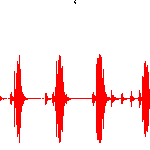

In [ ]:
#load the data files into the keras ,convert them to arrays ,scale them
#define the image dimension for keras preprocessing
IMG_DIM = (150, 150)


#define train file directory
train_files = glob.glob('training_data/*')

#load training images and convert to arrays with with imported keras.preprocessing  method
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]

#convert images to numpy arrays
train_imgs = np.array(train_imgs)


#define train labesl
train_labels = train_labels


# define the validation files directory 
validation_files = glob.glob('validation_data/*')

#load and convert images t arrays using keras load_img and img2arry methods
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]

#convert loaded images to numpy arrays 
validation_imgs = np.array(validation_imgs)

#define validation labels  
validation_labels = validation_labels




# define the validation files directory 
test_files = glob.glob('validation_data/*')

#load and convert images t arrays using keras load_img and img2arry methods
vatest_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]

#convert loaded images to numpy arrays 
test_imgs = np.array(test_imgs)

#define test labels  
test_labels = test_labels






#  we scale each image with pixel values between (0, 255) to values between (0, 1) making the input small
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
test_imgs_scaled = test_imgs.astype('float32')

train_imgs_scaled /= 255
validation_imgs_scaled /= 255
test_imgs_scaled /= 255





# lets visualize a sample image of preprocessing 
print(train_imgs[0].shape)
array_to_img(train_imgs[0])


In [ ]:
# lets check the shapes of our  train and validation inputs
train_imgs_scaled.shape,validation_imgs_scaled.shape,test_imgs_scaled.shape

((622, 150, 150, 3), (150, 150, 150, 3))

In [ ]:
#we perform basic configuration parameters 
batch_size = 25
num_classes = 31
epochs = 30
input_shape = (150, 150, 3) 

#we encode our text class labels into numeric

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()#instantiate label encoder method as le

le.fit(train_labels)#fit training labels of le
#transform labels and encode them
train_labels_encoded = le.transform(train_labels)
validation_labels_encoded = le.transform(validation_labels)
test_labels_encoded = le.transform(test_labels)

# sample  lables with their codes 
print(train_labels[8: 11], '\nNumbered_classes :' ,train_labels_encoded[8:11]) 



['chirping_birds', 'car_horn', 'sheep'] [ 4  1 24]


In [ ]:
from keras.utils import to_categorical

train_labels_encoded =to_categorical(train_labels_encoded,31)
validation_labels_encoded  =to_categorical(validation_labels_encoded,31)
test_labels_encoded  =to_categorical(test_labels_encoded,31)
train_labels_encoded.shape,validation_labels_encoded.shape,test_labels_encoded.shape
# validation_labels_encoded[0]

((622, 31), (150, 31))

Building our CNN model based on the the above feature engineered dataset.

Basic desription of model

In [ ]:
import keras 
from keras import models 
from keras import layers 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
from keras.models import Sequential 
from keras import optimizers 
 
# define our simple  model architecture
model = Sequential() 

# convolution and pooling layers 
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',  
                 input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
 
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Dense(31 , activation='softmax')) 
 
 
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(), 
              metrics=['accuracy']) 
 
model.summary() 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 36992)            

In [ ]:
# train the model 
history = model.fit(x=train_imgs_scaled, y=train_labels_encoded, 
validation_data=(validation_imgs_scaled,    
                 validation_labels_encoded), \
                 batch_size=batch_size, 
                 epochs=epochs,verbose=1) 

Epoch 1/30
25/25 [==============================] - 22s 898ms/step - loss: 12.2430 - accuracy: 0.0257 - val_loss: 3.4315 - val_accuracy: 0.0467
Epoch 2/30
25/25 [==============================] - 22s 884ms/step - loss: 3.4885 - accuracy: 0.0402 - val_loss: 3.4351 - val_accuracy: 0.0333
Epoch 3/30
25/25 [==============================] - 22s 885ms/step - loss: 3.6018 - accuracy: 0.0418 - val_loss: 3.4385 - val_accuracy: 0.0200
Epoch 4/30
25/25 [==============================] - 22s 881ms/step - loss: 3.5328 - accuracy: 0.0611 - val_loss: 3.4607 - val_accuracy: 0.0333
Epoch 5/30
25/25 [==============================] - 22s 881ms/step - loss: 3.3582 - accuracy: 0.0675 - val_loss: 3.4645 - val_accuracy: 0.0333
Epoch 6/30
25/25 [==============================] - 22s 878ms/step - loss: 3.1229 - accuracy: 0.1720 - val_loss: 4.0431 - val_accuracy: 0.0133
Epoch 7/30
25/25 [==============================] - 22s 880ms/step - loss: 2.5749 - accuracy: 0.2830 - val_loss: 4.6605 - val_accuracy: 0.033

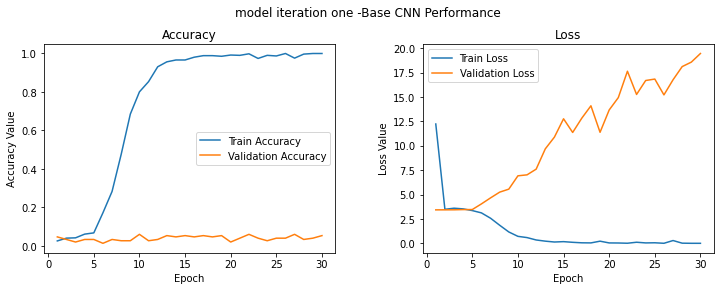

In [ ]:
# model evaluation for model 1 iteration
# looks like our model is overfitting based on the above features

# lets  visualise through plots 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
t = f.suptitle('model iteration one -Base CNN Performance', fontsize=12) 
f.subplots_adjust(top=0.85, wspace=0.3) 
 
epoch_list = list(range(1,31)) 
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5)) 
ax1.set_ylabel('Accuracy Value') 
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy') 
l1 = ax1.legend(loc="best")


ax2.plot(epoch_list, history.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5)) 
ax2.set_ylabel('Loss Value') 
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss') 
l2 = ax2.legend(loc="best") 

From the above plot, it can be observed that after approximately five epochs the model starts overfitting on our training data and underfits on our validation data

This goes to prove the fact that , the waveplot feature map, would perfom badly and not help us achieve our objective 

We will try and improve the above model with other techniques to see if it will perform better

In [ ]:
# improving our CNN model with regularization
# we improve by adding one more conv layer and dense hidden layer  and 
# dropout of 0.3 after each hidden dense layer to enable regularization



model2 = Sequential() 
# convolutional and pooling layers 
model2.add(Conv2D(16, kernel_size=(3, 3), activation='relu',  
                 input_shape=input_shape)) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
model2.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
model2.add(MaxPooling2D(pool_size=(2, 2))) 
 
model2.add(Flatten()) 
model2.add(Dense(512, activation='relu')) 
model2.add(Dropout(0.3)) 
model2.add(Dense(512, activation='relu')) 
model2.add(Dropout(0.3)) 
model2.add(Dense(31, activation='softmax')) 
 
model2.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.RMSprop(), 
              metrics=['accuracy']) 

In [ ]:
history2 = model2.fit(x=train_imgs_scaled, y=train_labels_encoded, 
validation_data=(validation_imgs_scaled,    
                 validation_labels_encoded), \
                 batch_size=batch_size, 
                 epochs=epochs,verbose=1) 

Epoch 1/30
25/25 [==============================] - 21s 841ms/step - loss: 3.5941 - accuracy: 0.0273 - val_loss: 3.4353 - val_accuracy: 0.0333
Epoch 2/30
25/25 [==============================] - 21s 835ms/step - loss: 3.4369 - accuracy: 0.0338 - val_loss: 3.4353 - val_accuracy: 0.0333
Epoch 3/30
25/25 [==============================] - 21s 835ms/step - loss: 3.4362 - accuracy: 0.0354 - val_loss: 3.4374 - val_accuracy: 0.0333
Epoch 4/30
25/25 [==============================] - 26s 1s/step - loss: 3.4351 - accuracy: 0.0338 - val_loss: 3.4420 - val_accuracy: 0.0200
Epoch 5/30
25/25 [==============================] - 21s 835ms/step - loss: 3.4353 - accuracy: 0.0322 - val_loss: 3.4404 - val_accuracy: 0.0267
Epoch 6/30
25/25 [==============================] - 21s 835ms/step - loss: 3.4315 - accuracy: 0.0354 - val_loss: 3.4849 - val_accuracy: 0.0333
Epoch 7/30
25/25 [==============================] - 21s 834ms/step - loss: 3.4208 - accuracy: 0.0531 - val_loss: 3.4559 - val_accuracy: 0.0267
Ep

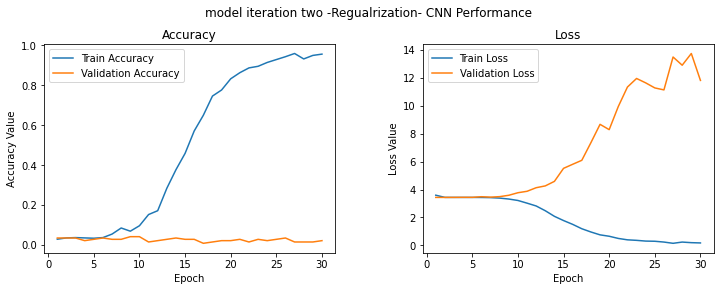

In [ ]:
# model evaluation for model 2 iteration
# looks like our model is overfitting based on the above features

# lets  visualise through plots 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4)) 
t = f.suptitle('model iteration two -Regualrization- CNN Performance', fontsize=12) 
f.subplots_adjust(top=0.85, wspace=0.3) 
 
epoch_list = list(range(1,31)) 
ax1.plot(epoch_list, history2.history['accuracy'], label='Train Accuracy') 
ax1.plot(epoch_list, history2.history['val_accuracy'], label='Validation Accuracy') 
ax1.set_xticks(np.arange(0, 31, 5)) 
ax1.set_ylabel('Accuracy Value') 
ax1.set_xlabel('Epoch') 
ax1.set_title('Accuracy') 
l1 = ax1.legend(loc="best")


ax2.plot(epoch_list, history2.history['loss'], label='Train Loss') 
ax2.plot(epoch_list, history2.history['val_loss'], label='Validation Loss') 
ax2.set_xticks(np.arange(0, 31, 5)) 
ax2.set_ylabel('Loss Value') 
ax2.set_xlabel('Epoch') 
ax2.set_title('Loss') 
l2 = ax2.legend(loc="best") 

It can be observed that the model2 performs slightly better but takes slightly a long time to overfit  but the validation is quite poor 

In [ ]:
# we save models for future evaluations
model.save('chainsaw_cnnBase_model.h5')
model2.save('chainsaw_cnnRegualarization_model.h5')

Due to the poor performance of the cnn model even after regualarization, we have come to the conclusion that, our feature genrated waveplot dataset is not the best dataset to help us achieve our objective 

In [ ]:
from keras.models import load_model
prdter2 = load_model('/content/chainsaw_cnnRegualarization_model.h5')
prdter1 = load_model('/content/chainsaw_cnnBase_model.h5')


prdter1.predict_classes(validation_imgs_scaled)


array([11, 27, 27, 19, 24,  0,  7, 16,  7,  8, 11, 21,  3, 26, 19,  9, 26,
       28, 11, 26,  6, 27, 18, 26, 16,  5,  8, 17, 17, 24, 11, 20, 29, 18,
        8,  1,  5, 16, 20, 27, 17, 25,  6, 21,  4, 12, 17, 23, 30, 30,  0,
       26, 11, 19,  8, 19,  9,  3,  2,  5,  7, 19, 23,  7, 14, 20,  3,  6,
        6, 17, 20, 10, 21, 16, 30, 17,  7, 17,  4, 19, 27,  7, 21, 13, 17,
       19,  1,  3, 24,  1, 21, 12,  8, 10, 12, 24, 30, 12, 20,  0,  3, 12,
        6, 21,  3,  5,  3, 26,  3,  8, 11,  3,  0, 15, 18, 11, 26,  7, 19,
       16, 18,  1,  7,  5,  4, 10, 14, 15, 19,  1,  0,  0,  5, 30, 13, 24,
       15, 21, 23,  4, 29, 16,  1, 26,  0, 16, 11, 19, 18,  8])

In [ ]:
prdter2.predict_classes(validation_imgs_scaled)

array([12,  0, 19, 30, 19,  0,  7, 11,  3,  4, 16, 25,  3, 26,  3, 21, 26,
       28, 11, 27,  3, 24,  7, 17, 16,  8, 24,  7,  6,  3,  1, 12, 26,  3,
       11, 20, 10, 15, 21, 19, 17, 24,  7, 23, 11, 10, 26, 23, 15, 11, 29,
        5,  4, 25, 21, 29, 24,  4,  0, 29, 12,  9, 23,  9,  9, 28,  3, 26,
        6,  3, 12, 10, 21,  8, 15, 17, 29, 17,  7,  4,  4,  7, 20, 12,  5,
       27, 17,  8,  6,  1,  3, 12,  8, 10, 26, 30, 28, 12, 20,  0,  6, 12,
        6,  5, 26,  1, 26,  8,  4,  9, 11,  3,  2,  5, 15,  3,  6,  7, 16,
        4,  6, 30,  3,  6, 26,  0, 29, 17,  9,  7,  0, 10,  6, 15,  8, 24,
        6, 21, 20,  3, 15,  8, 24, 11, 20, 17, 24,  3, 29, 25])

In [ ]:
# Model evaluation

In [ ]:
# utility functions
# EVALUATION UTIL FUNCTIONS 
# We will need utility functions for to analyze the performance of our model




# ----------------------------------------------------------------------------------


# ----------------------------------------------------------------------------------
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.base import clone
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.metrics import roc_curve, auc 
import seaborn as sns

# ----------------------------------------------------------------------------------

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
  
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# ----------------------------------------------------------------------------------
def get_metrics(true_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
 # ----------------------------------------------------------------------------------                       

 
def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print(report)
    
    
 # ----------------------------------------------------------------------------------   

# ----------------------------------------------------------------------------------

       
    

**Conclusion**
The models dont perfom well hence they cannot be applied to our problem for inference 